<h1><font face= "Helvetica" color = #2a7bbd><center>Kumaran Ramalingam</center></font></h1>

<h1><center><font face= "Helvetica" color = #2a7bbd>Automation Developer</font></center></h1>

<h1><center><font face= "Helvetica" color = #2a7bbd>kumaran.ramalingam@dxc.com </font></center></h1>

<h3><center><font face= "Helvetica" color = #2a7bbd>https://github.com/kumar1987an</font></center></h3>
<h3><center><font face= "Helvetica" color = #2a7bbd>Workplace - "We Learn Python"</font></center></h3>

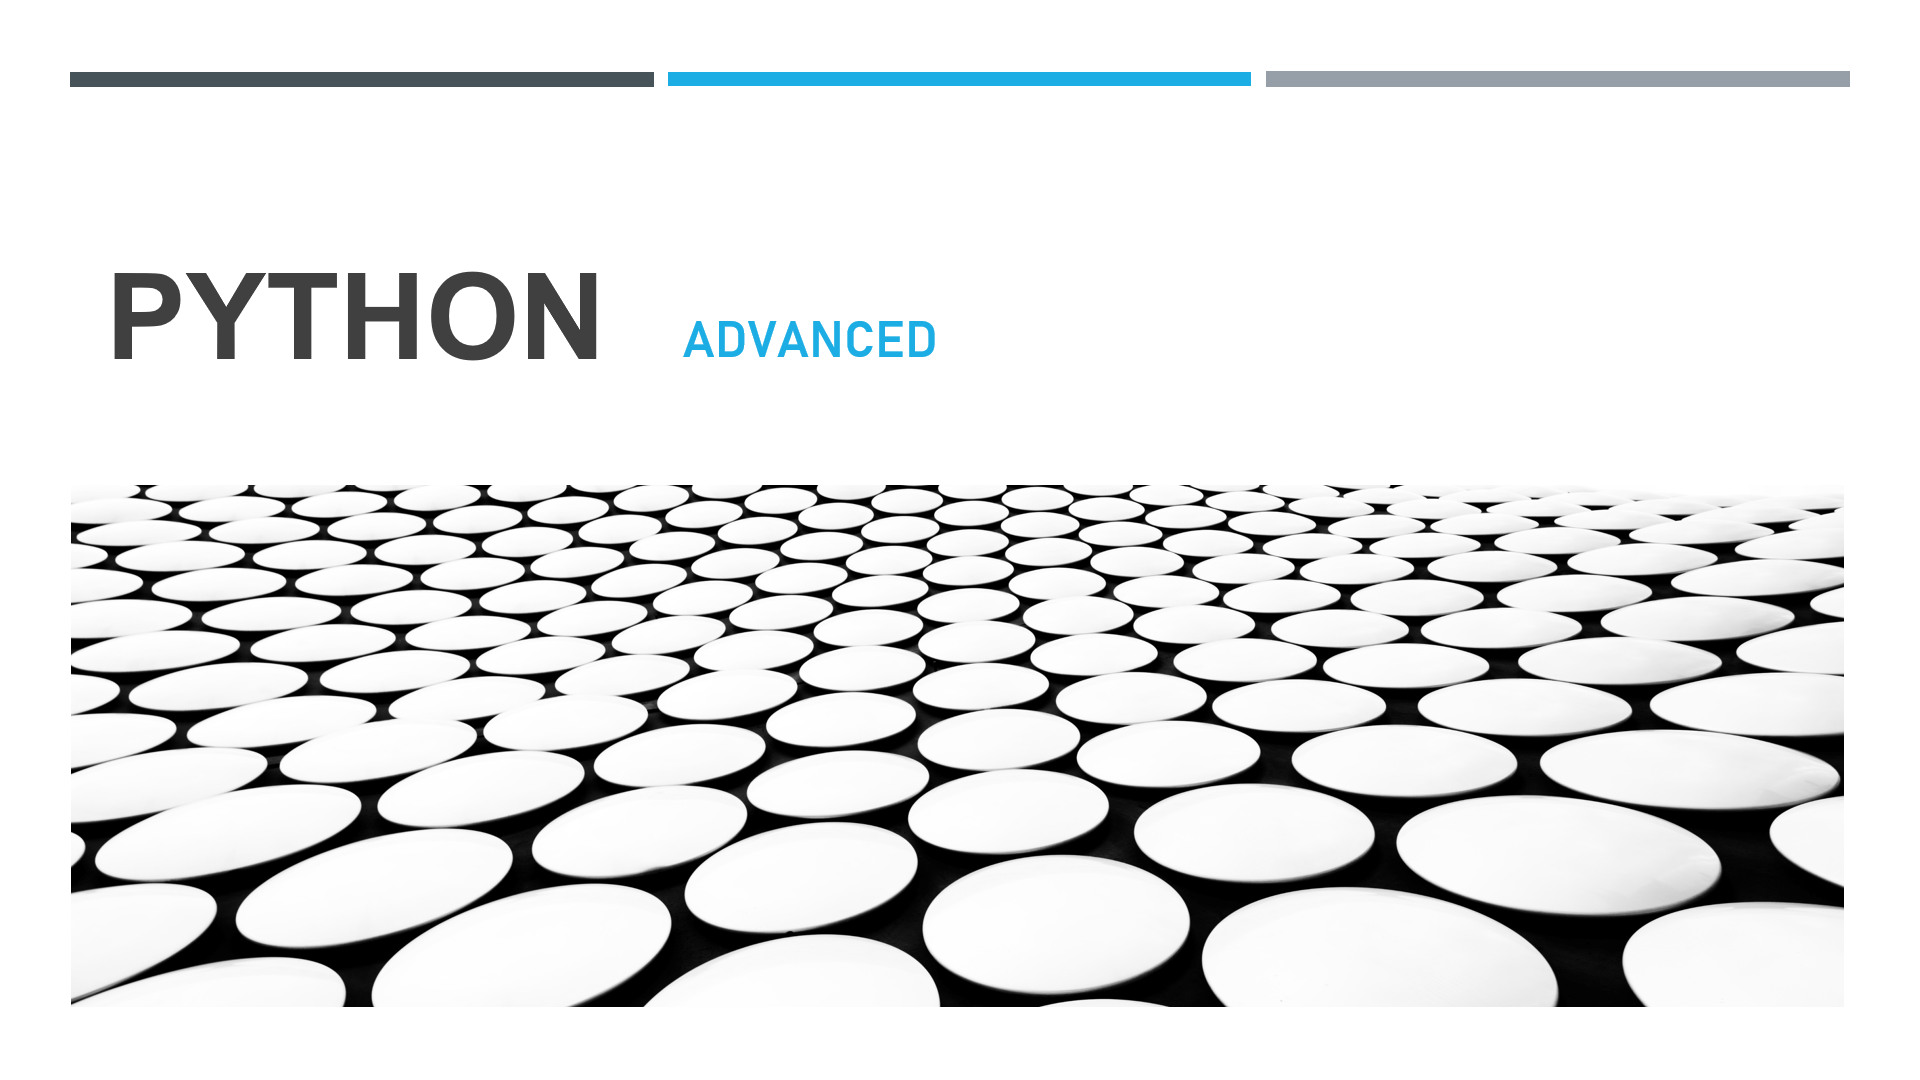

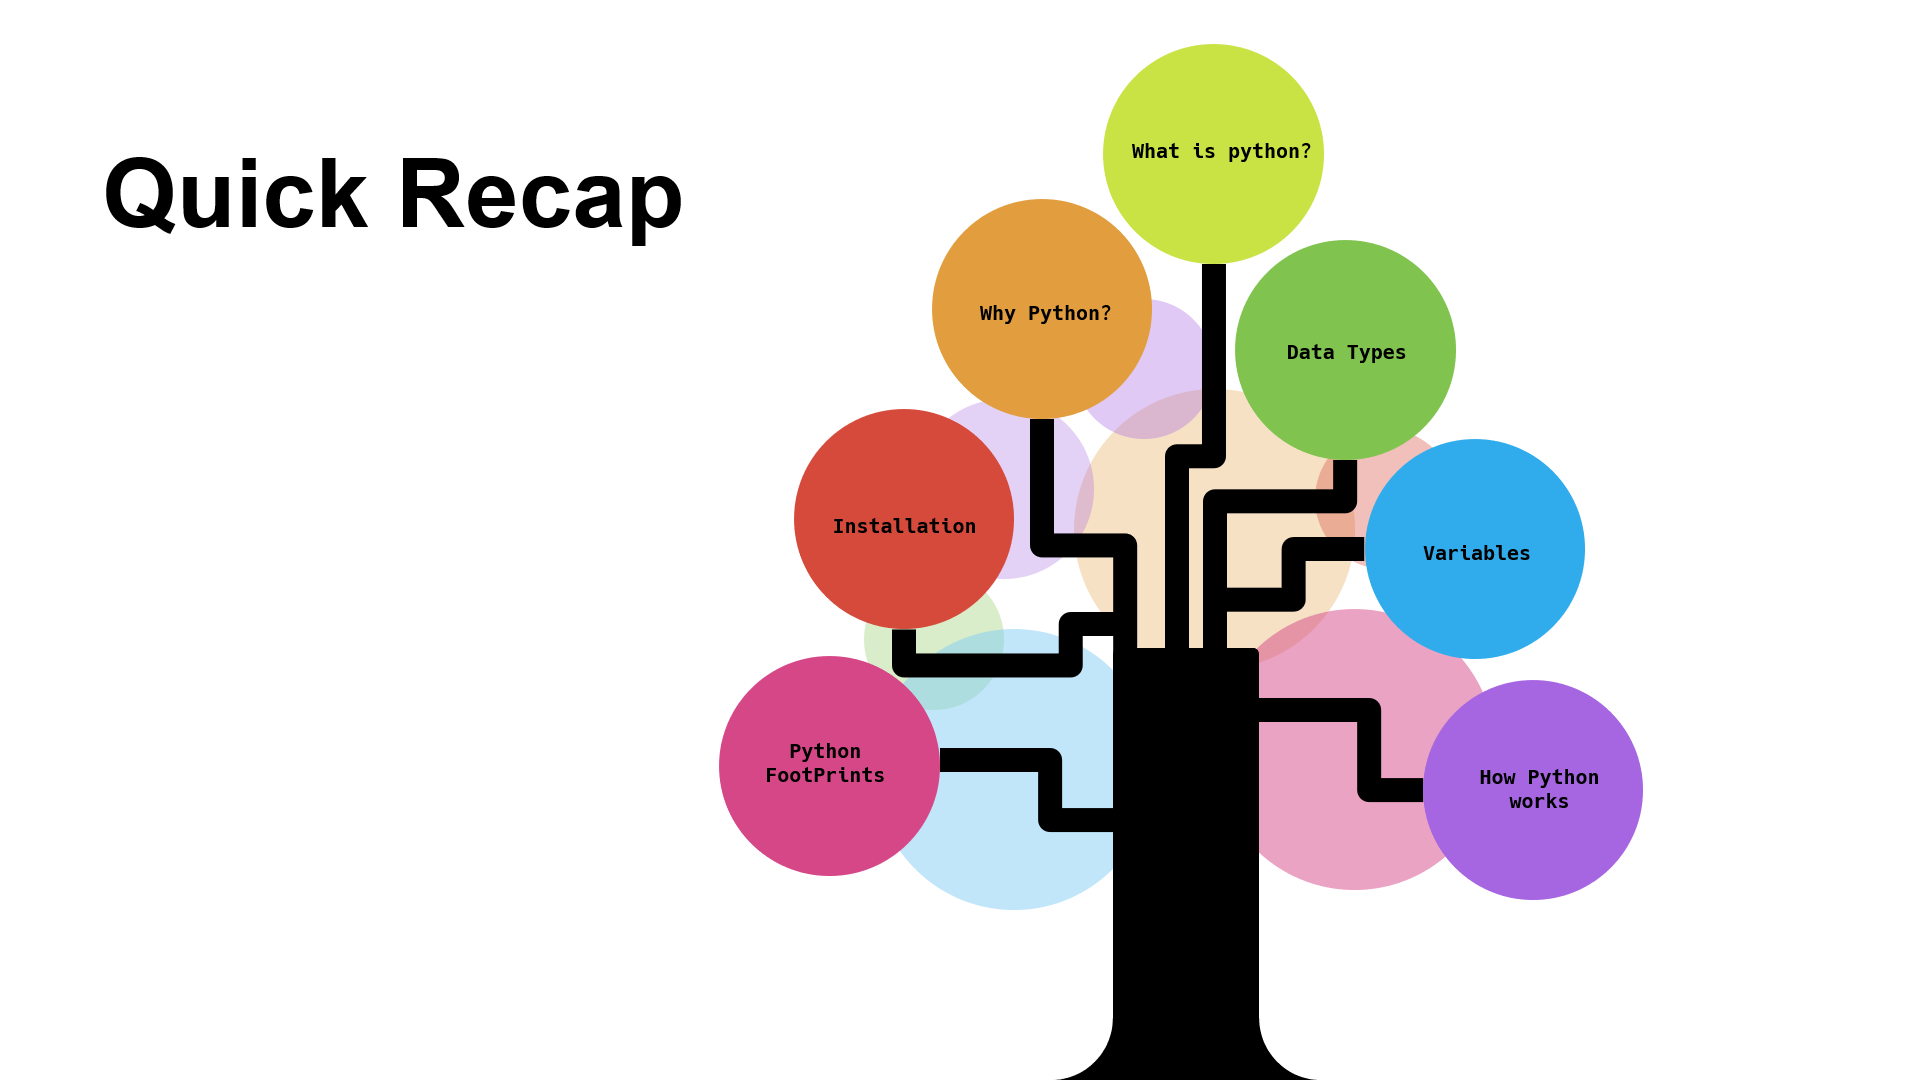

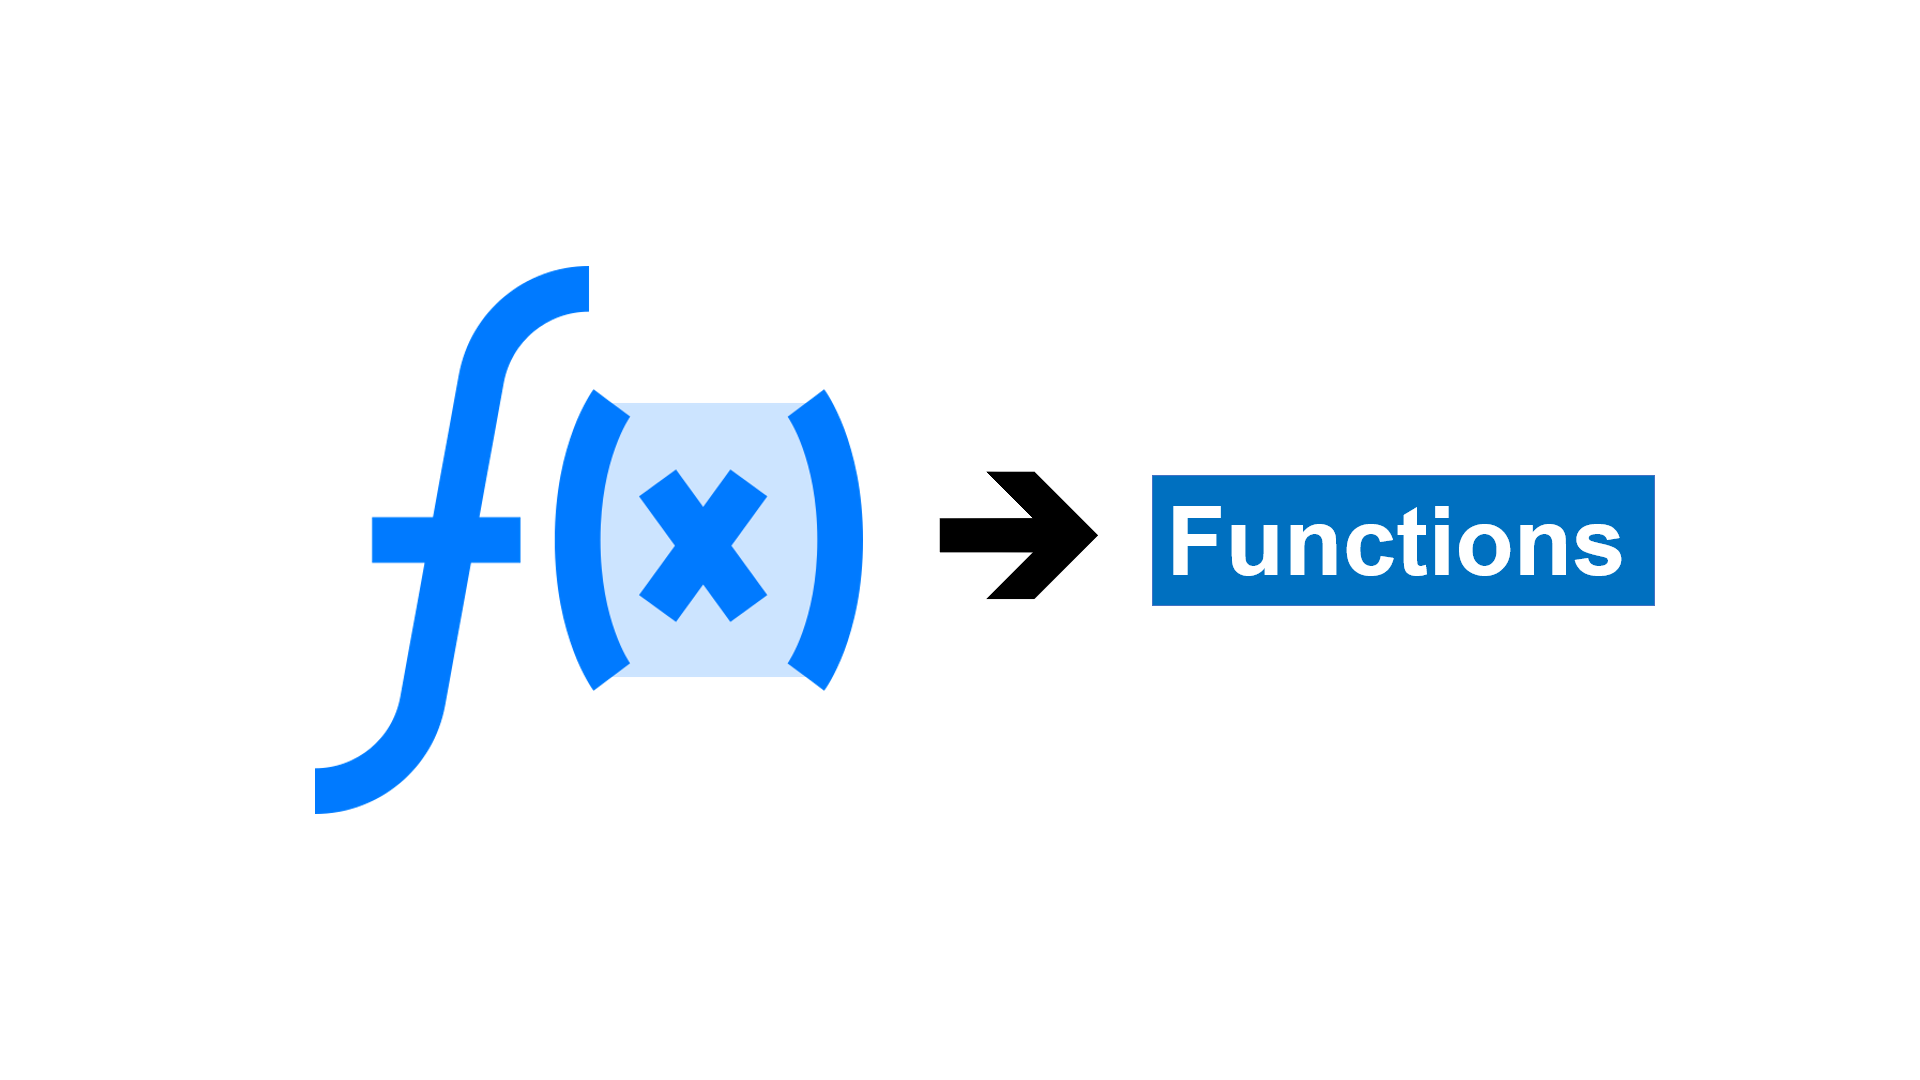

* <h3><font face= "Helvetica" color = DarkCyan> A self-contained block of code that encapsulates a specific task or related group of tasks</font></h3>
* <h3><font face= "Helvetica" color = DarkCyan> Code re-usage</font></h3>

```python
def function_name(arguments):
    """ doc-string - a short description about the function """
    # Code block
    <statement>
    print(output1)
    print(output2)
```
<br>

```python
def function_name(arguments):
    """ doc-string - a short description about the function """
    # Code block
    <statement>
    return output1, output2
```


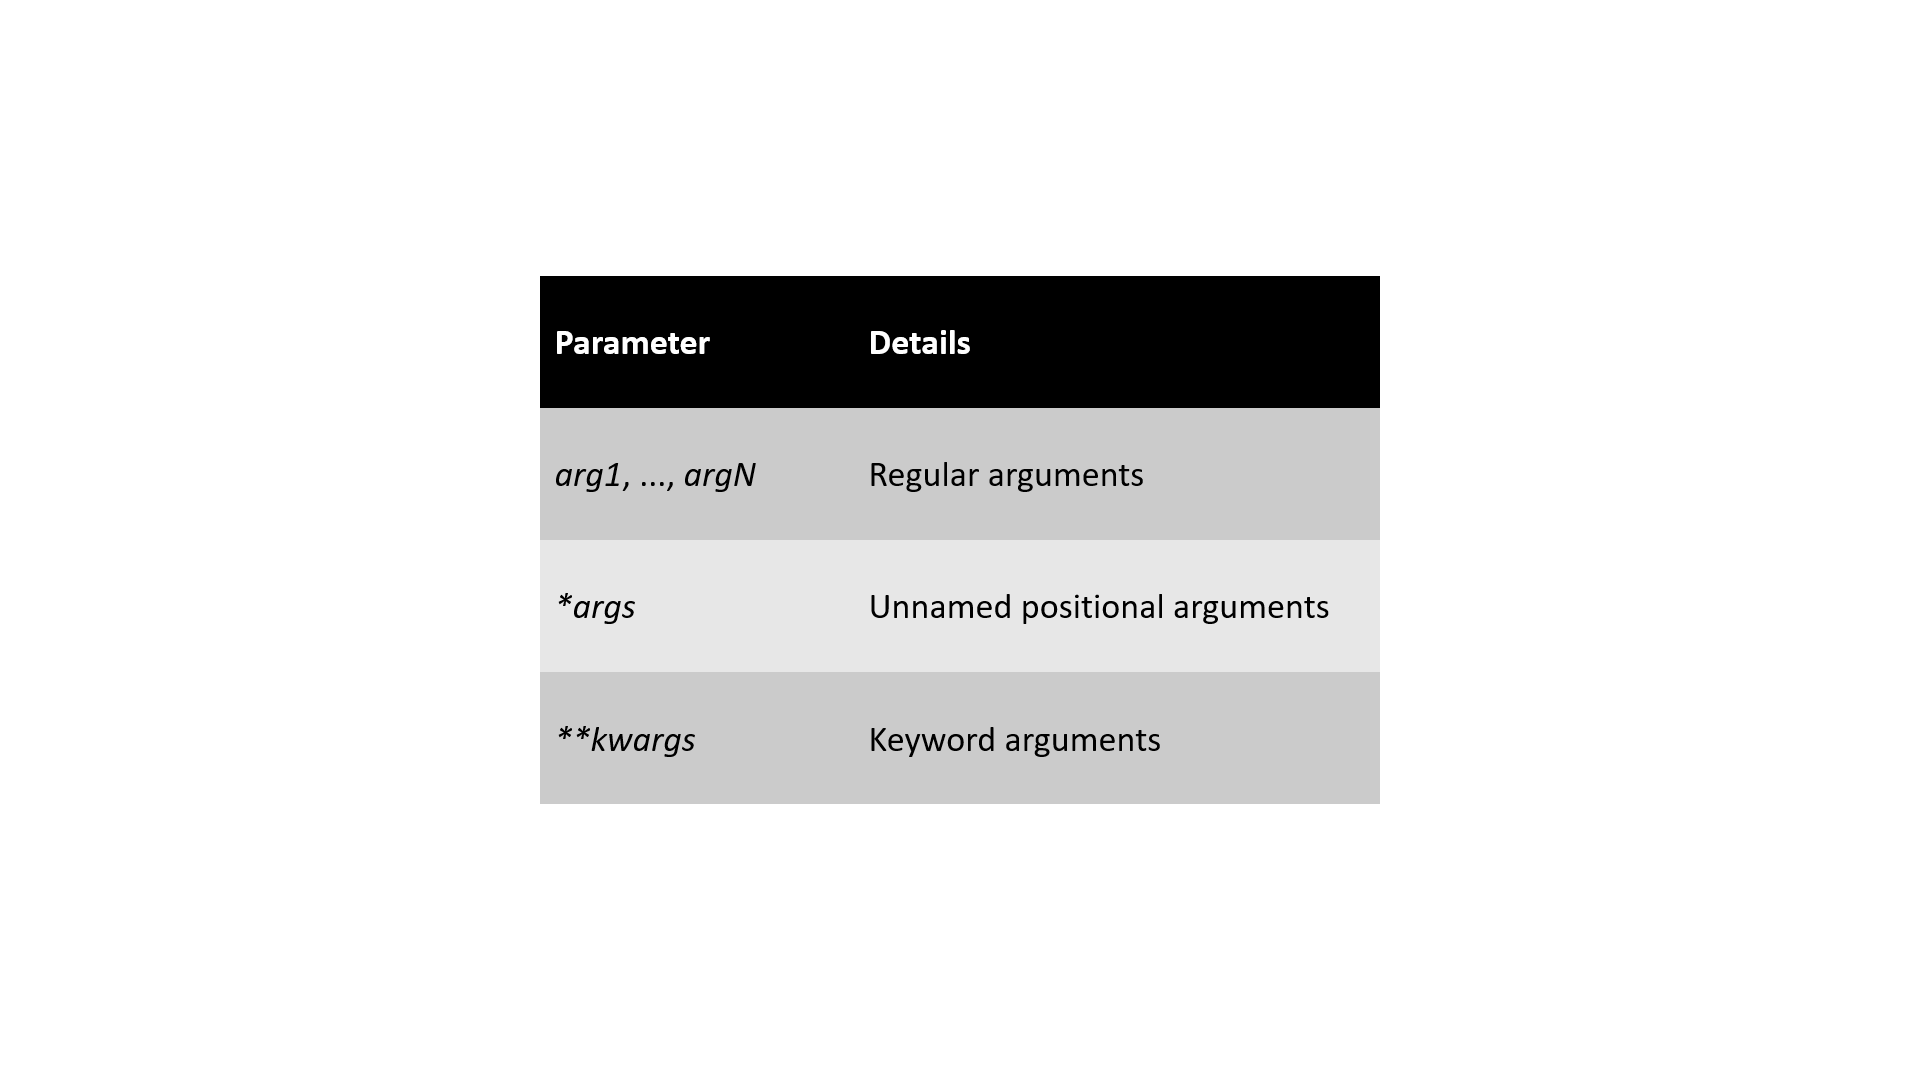

<h2><font face= "Helvetica" color = #717d7e> Functions with default arguments</font></h2>

In [1]:
##### Code
def odd_numbers(start_range=1, end_range=10, step_value=5):
    return [i for i in range(start_range, end_range, step_value) if i % 2 != 0]

print(odd_numbers(10, 100, 1)) # Arguments over-ride

[11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


<h2><font face= "Helvetica" color = #717d7e> Positional Arguments Function</font></h2>

In [2]:
# Code
def positional_args(*args): # *args is positional arguments will give you tuple output
    return args, type(args)

positional_args('10', "name", [1, 2, 3, 4], -9+78j)

(('10', 'name', [1, 2, 3, 4], (-9+78j)), tuple)

<h2><font face= "Helvetica" color = #717d7e> Keyword Arguments Function</font></h2>

In [3]:
# Code
def keyword_args(**kwargs): # **kwargs is positional arguments will give you tuple output
    return kwargs, type(kwargs)
print(keyword_args(a=20, b=30, c=40))

# Fun with args and kwargs

def playful_function(x, y, *args, **kwargs):
    return x, y, args, kwargs

print(playful_function(1, 2, (78, 67, 56,), a=100, b=29, c=20))

({'a': 20, 'b': 30, 'c': 40}, <class 'dict'>)
(1, 2, ((78, 67, 56),), {'a': 100, 'b': 29, 'c': 20})



<h2><font face= "Helvetica" color = #717d7e> Closure and Nested Functions</font></h2>

<h4><font face= "Helvetica" color = DarkCyan>A Closure is an inner function that remembers and has access to variables in the local scope that its created even after outer function finished executed</font></h4>

In [ ]:
# Example Code
import logging
logging.basicConfig(filename='sample.log', level=logging.INFO)
# DEBUG = 10, INFO = 20, WARNING = 30, ERROR = 40,  CRITICAL=50
def logger(func):
    def log_func(*args):
        logging.info('Running "{}" with arguments {}'.format(func.__name__, args))
        print(func(*args))
    return log_func

def add(x, y):
    return x + y

def sub(x, y):
    return x - y

add_logger = logger(add)
sub_logger = logger(sub)

add_logger(2, 5)
sub_logger(67, 3)

In [ ]:
# %load sample.log
INFO:root:Running "add" with arguments (2, 5)
INFO:root:Running "sub" with arguments (67, 3)
INFO:root:Running "add" with arguments (2, 5)
INFO:root:Running "sub" with arguments (67, 3)
INFO:root:Running "add" with arguments (2, 5)
INFO:root:Running "sub" with arguments (67, 3)


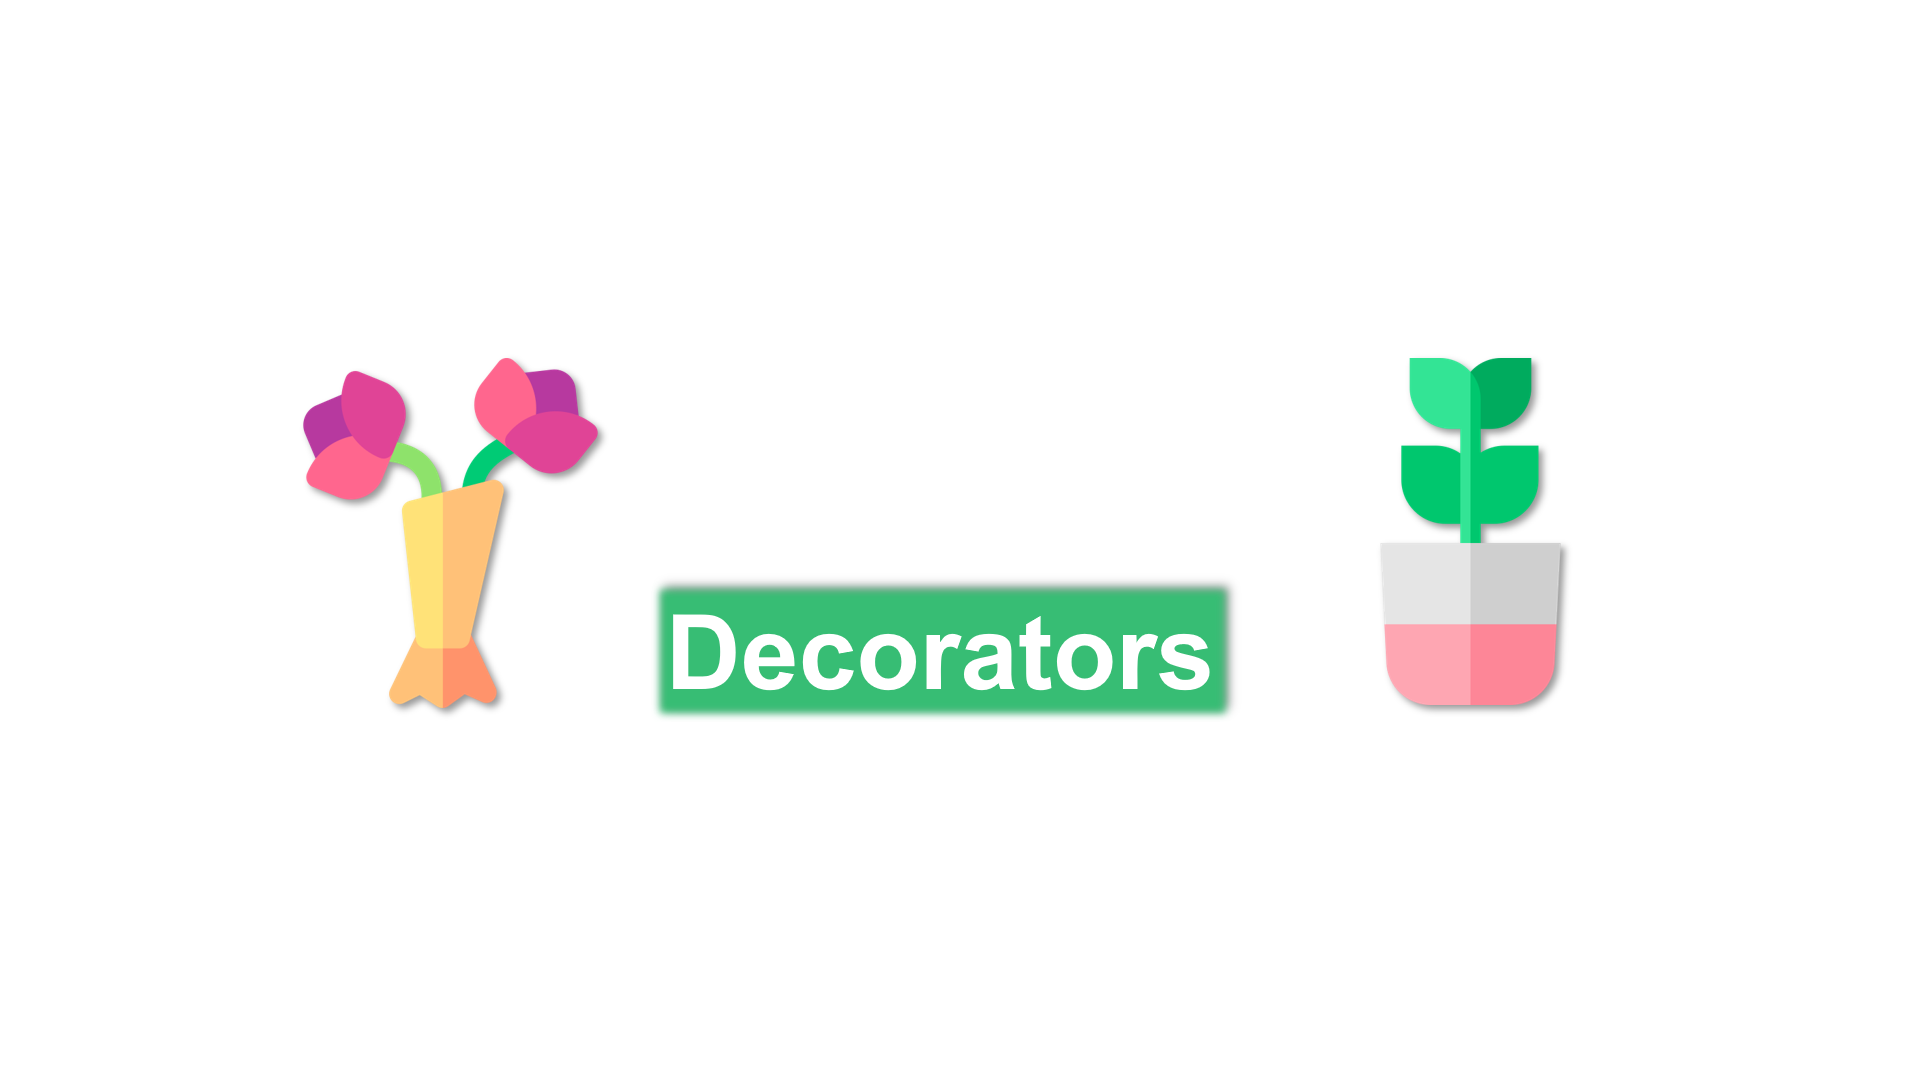

<h4><font face= "Helvetica" color = DarkCyan>Decorator functions are software design patters. They dynamically alter the functionality of a function, method or class without having to directly use the subclasses or change the source code of the decorated function<br><br>
Decorators augment the behavior of the other functions or methods. Any function that takes a function as a parameter and returns an augmented function can be used a decorator</font></h4>

In [1]:
# Decorator Function
import functools
def decorated_function(original_function):
    @functools.wraps(original_function)
    def wrapped_function(*args, **kwargs):
        print("wrapped_function executed before {}".format(original_function.__name__))
        return original_function(*args, **kwargs)
    return wrapped_function

# @decorated_function
# def display():
#     print("display function ran")

@decorated_function
@decorated_function
def display_info(name, age):
    print('display_info ran with arguments ({}, {})'.format(name, age))
    
# decorated_display = decorated_function(display)
# display()
display_info("Python", 20)
# print(display.__name__)

wrapped_function executed before display_info
wrapped_function executed before display_info
display_info ran with arguments (Python, 20)


In [2]:
# Decorator Class
class Decorated_class(object):
    def __init__(self, original_function):
        self.original_function = original_function
    def __call__(self, *args, **kwargs):
        print("wrapped_function executed before {}".format(self.original_function.__name__))
        return self.original_function(*args, **kwargs)

@Decorated_class
def display():
    print("display function ran")
    
@Decorated_class
def display_info(name, age):
    print('display_info ran with arguments ({}, {})'.format(name, age))
    
display()
display_info("Python", 20)
        

wrapped_function executed before display
display function ran
wrapped_function executed before display_info
display_info ran with arguments (Python, 20)


In [ ]:
# Decorator Template
import functools
def decorated_function(func):
    @functools.wraps(func)
    def wrapped_function(*args, **kwargs):
        func(*args, **kwargs)
        return func(*args, **kwargs)
    return wrapped_function

sum([1, 2, 3, 4])

In [3]:
# Example 1
# Timing function: time taken for a function call to complete
import functools
import time

def timer(func):
    """ Print the runtime of the decorated function """
    @functools.wraps(func)
    def wrapped_timer(*args, **kwargs):
        start_time = time.perf_counter()
        value = func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        print(f"Finished {func.__name__!r} in {run_time:.4f} secs")
        return value
    return wrapped_timer

@timer
def waste_some_time(num_times):
    for i in range(num_times):
        sum([i**2 for i in range(10000)])
        
waste_some_time(1)
waste_some_time(998)

Finished 'waste_some_time' in 0.0033 secs
Finished 'waste_some_time' in 3.0426 secs


In [4]:
# Example 2
# to print the arguments a function is called with as well as its return value every time the function is called

import functools
def debug(func):
    """ Print the function signature and return value """
    @functools.wraps(func)
    def wrapper_debug(*args, **kwargs):
        args_repr = [repr(a) for a in args]
        kwargs_repr = [f"{k}={v!r}" for k, v in kwargs.items()]
        signature = ",".join(args_repr + kwargs_repr)
        print(f"Calling {func.__name__}({signature})")
        value = func(*args, **kwargs)
        print(f"{func.__name__!r} returned {value!r}")
        return value
    return wrapper_debug

@debug
def make_greeting(name, age=None):
    if age is None:
        return f"Howdy {name}!"
    else:
        return f"Whoa {name}! {age} already you are growing up!"

# print(make_greeting("Benjamin"))
print(make_greeting("Richard", age=112))
# print(make_greeting(name="Virus", age=116))


Calling make_greeting('Richard',age=112)
'make_greeting' returned 'Whoa Richard! 112 already you are growing up!'
Whoa Richard! 112 already you are growing up!


In [5]:
a = [1 ,2, 3]

b = a
print(a)
print(b)
print(a == b)
print(a is b)

c = list(a)
print(c)
print(a == c)
print(a is c)
print(id(a))
print(id(b))
print(id(c))

[1, 2, 3]
[1, 2, 3]
True
True
[1, 2, 3]
True
False
2239783792768
2239783792768
2239783505152


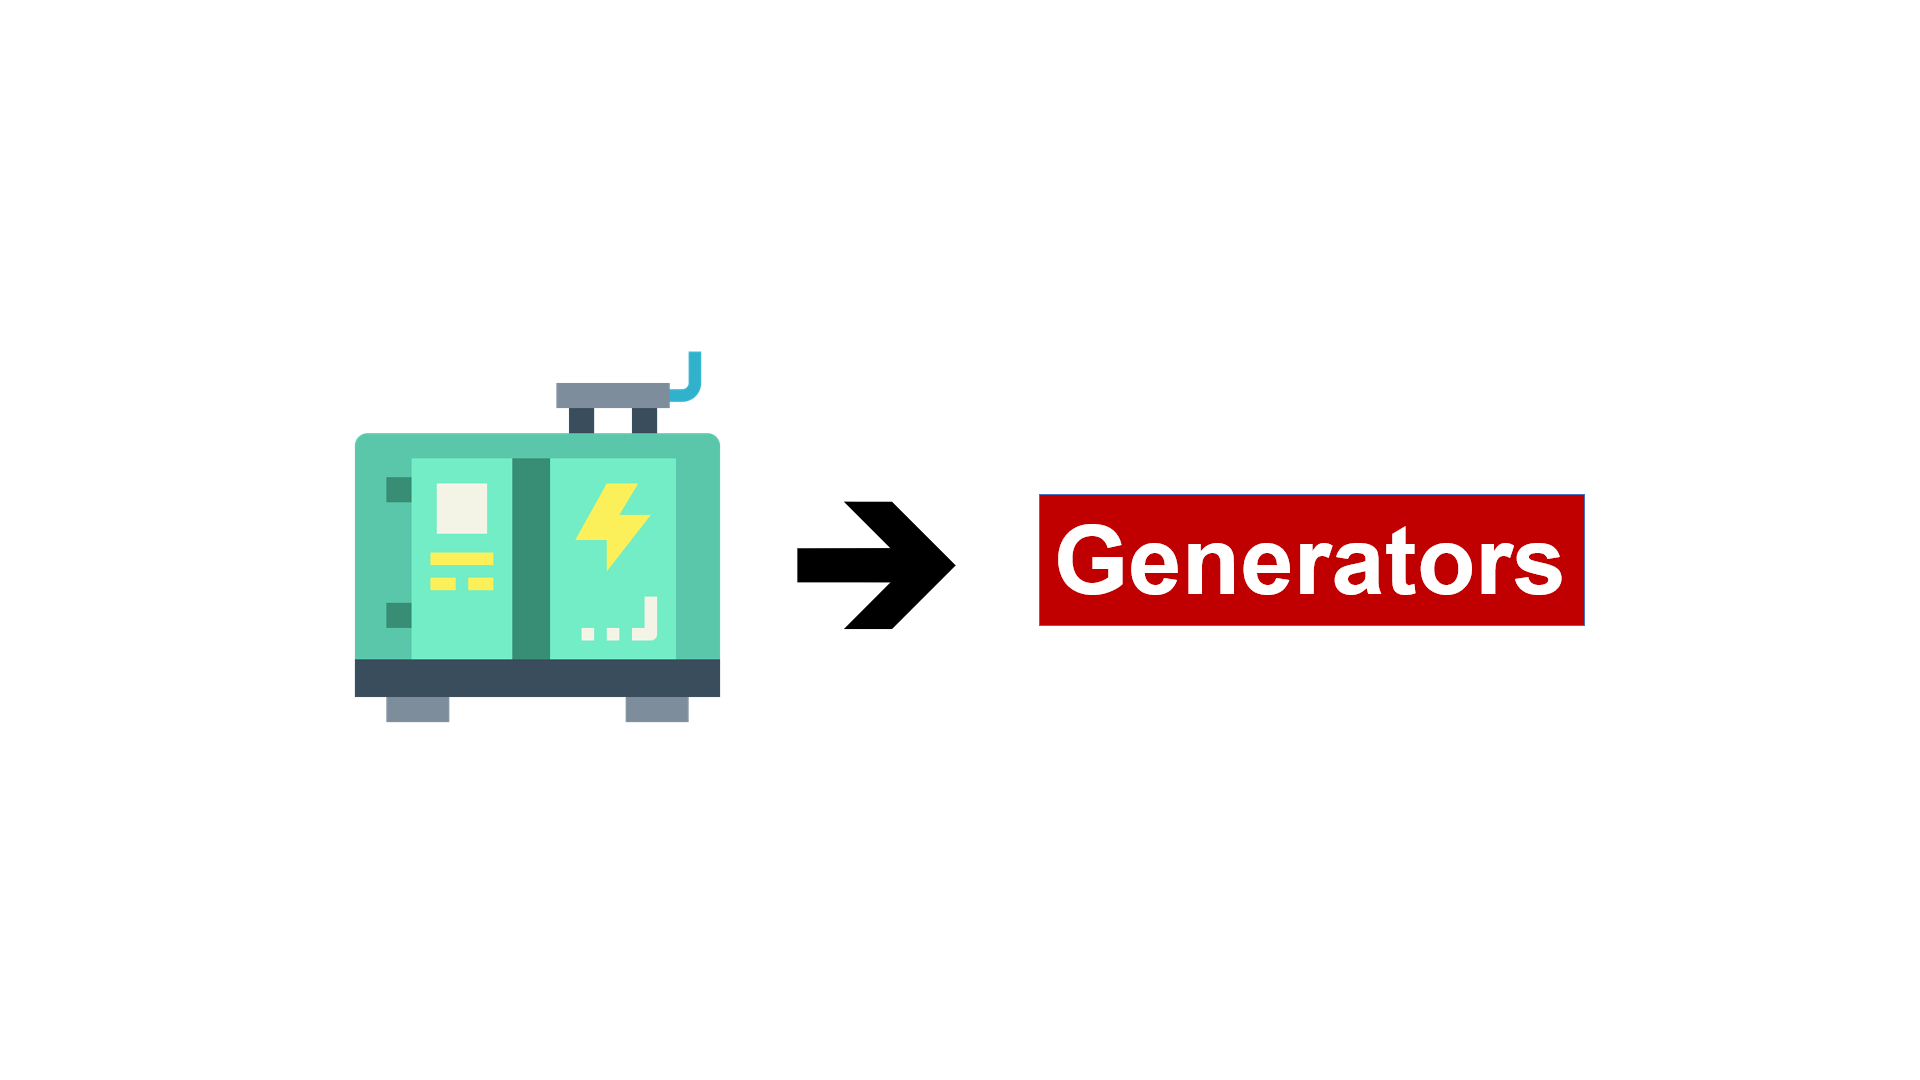

<h3><font face= "Helvetica" color = #717d7e>Generators are lazy iterators created by generator functions (using yield) or generator expressions</font></h3>


<h2><font face= "Helvetica" color = #717d7e> Simple Iterators</font></h2>

- Iterator provides a sequence interface to python objects that's memory efficient and considered Pythonic. Behold the beauty of the for-in loop
- To Support iteration an object needs to implement the iterator protocol by providing the __iter__ and __next__ dunder methods.
- Class-based iterators are only way to write iterable objects in python. Also consider generators and generator expressions

In [6]:
# Code
print([value for value in range(1, 20, 2)]) # List Comprehension
print({value for value in range(1, 20, 2)}) # Set Comprehension
print({key:value for key, value in zip(["a", "b", "c"], [1, 2, 3])}) # Dict Comprehension
print((value for value in range(1, 20 ,2)))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
{1, 3, 5, 7, 9, 11, 13, 15, 17, 19}
{'a': 1, 'b': 2, 'c': 3}
<generator object <genexpr> at 0x000002097D841430>


<h2><font face= "Helvetica" color = #717d7e>Generator Functions</font></h2>

- Generator functions are syntactic sugar for writing objects that support the iterator protocol. Generators abstract away much of the boilerplate code needed when writing class-based iterators.
- The yield statement allow you to temporarily suspend execution of a generator function and to pass back values from it.
- Generators start raising StopIteration exceptiosn after control flow leaves the generator function by any means other than a yield statement.

In [4]:
# Code
# def repeater():
#     x = 0
#     while True:
#         yield x
#         x = x + 1
        
# generator = repeater()
# for i in range(1, 15):
#     print(next(generator))

# def repeater(value):
#     while True:
#         yield value

def boundrepeater(value, maxvalue):
    for i in range(maxvalue):
        yield value
        
for i in boundrepeater("Hello", 10):
    print(i)

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


<h2><font face= "Helvetica" color = #717d7e>Generator Expressions</font></h2>

- Generator expressions are similar to list comprehensions
- Once a generator expression is consumed it should be restarted or reused
- Generator expressions are best for implementing single "adhoc" iterators. For complex iterators, its better to write a generator function or class iterators.

In [8]:
# Code
gen1 = (value for value in range(1, 20 ,2))
for i in gen1:
    print(i)

1
3
5
7
9
11
13
15
17
19


In [9]:
def fibonacci(n):
    prev, curr = 0, 1
    # infinite loop
    while prev < n:
        value = prev
        # Calculate the next number in the sequence, Using Tuple unpacking
        prev, curr = curr, prev + curr
        # yield the value
        yield value
gen = fibonacci(10000000)
print(gen)
for i in gen:
    print(i, end= " ")

<generator object fibonacci at 0x000002097D841660>
0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 

In [10]:
# Performance computation between list and generator
import sys
# List comprehension
mylist = [i for i in range(10000000)]
print('Size of list in memory', sys.getsizeof(mylist))
# Generator Expression
mygen = (i for i in range(10000000))
print('Size of generator in memory', sys.getsizeof(mygen))

Size of list in memory 81528048
Size of generator in memory 112


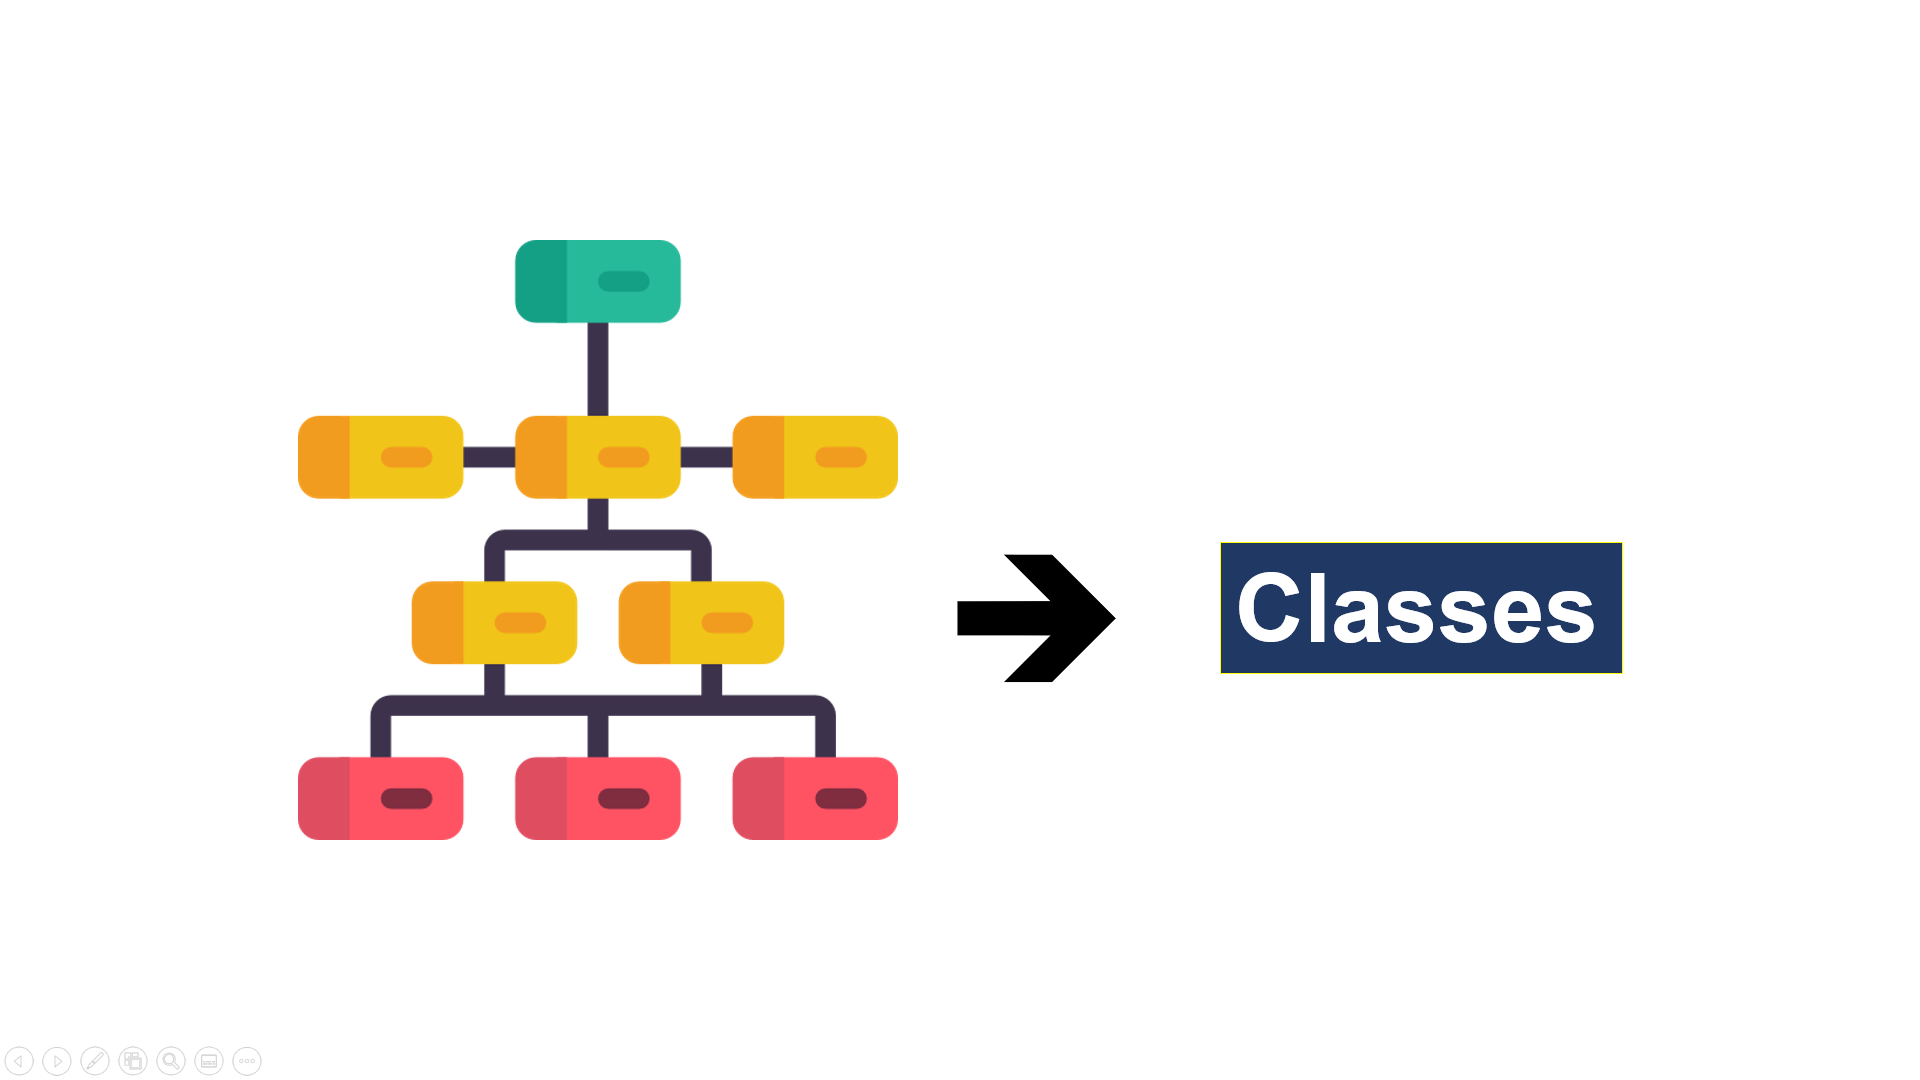

<h3><font face= "Helvetica" color = #717d7e> An object is simply a collection of data(variables) and methods(functions) that act on those data. <br><br>
A class is a blueprint of that object</font></h3>

In [11]:
# Code
class BaseModel:
    """ Represent base model of a car """
    trim = 'normal'     # Class attributes
    engine_liters = 1.5 # Class attributes
    
    def engine_sound(self): # instance method
        return 'putt, putt'
    
    def horn_sound(self):  # instance method
        return 'beep, beep'
    
    def __str__(self):    # instance method
        return 'Base Model'

coop = BaseModel() # coop1 is an instance
# coop2 = BaseModel() # coop2 is an instance
print(coop.__class__.__name__)
print('%s has %s time level.' % (coop, coop.trim))
print('%s has a %s liter engine.' % (coop, coop.engine_liters))
print('%s engine sounds like %s' % (coop, coop.engine_sound))
print('%s horn sounds like %s' % (coop, coop.horn_sound))

BaseModel
Base Model has normal time level.
Base Model has a 1.5 liter engine.
Base Model engine sounds like <bound method BaseModel.engine_sound of <__main__.BaseModel object at 0x000002097D80ACD0>>
Base Model horn sounds like <bound method BaseModel.horn_sound of <__main__.BaseModel object at 0x000002097D80ACD0>>


In [12]:
# Code
class BaseModel:
    """ Represent base model of a car """
    trim = 'normal'     # Class attributes
    engine_liters = 1.5 # Class attributes

    def __init__(self, brand, price, transmission="automatic", color="white"):
        self.brand = brand
        self.price = price
        self.transmission = transmission
        self.color = color
    
    def speed_of_the_car(self, speed):
        return speed
    
    def name_of_the_car(self):
        return self.brand

suzuki1 = BaseModel("6.5L", "manual", "red")
print(f"suzuki1 car have {suzuki1.__class__.engine_liters} with the price {suzuki1.price}")
print(suzuki1.transmission)
print(suzuki1.color)
suzuki1.color = "black"
print(suzuki1.color)
print()
ducatti = BaseModel("Ducatti", "10C")
print(ducatti.transmission)
print(ducatti.price)
print(ducatti.color)
print(ducatti.speed_of_the_car(245))
print(ducatti.name_of_the_car().upper())

suzuki1 car have 1.5 with the price manual
red
white
black

automatic
10C
white
245
DUCATTI


In [13]:
# Code
# class vs Instance Attributes Pitfall

class Dog:
    num_legs = 4 #  class attribute
    
    def __init__(self, name):
        self.name = name #  instance attribute
        
jack = Dog('Jack')   
jill = Dog('Jill')
print(jack.name, jill.name)
print(jack.num_legs, jill.num_legs)
print(Dog.num_legs)
Dog.num_legs = 6
print(jack.num_legs, jill.num_legs)
Dog.num_legs = 4
jack.num_legs =6
print(jack.num_legs, jill.num_legs, Dog.num_legs)
print(jack.num_legs, jack.__class__.num_legs)

Jack Jill
4 4
4
6 6
6 4 4
6 4


In [14]:
class CountedObject:
    num_instances = 0
    def __init__(self):
        self.__class__.num_instances = self.__class__.num_instances + 1
        
print(CountedObject.num_instances)
print(CountedObject().num_instances)
print(CountedObject().num_instances)
print(CountedObject().num_instances)
print(CountedObject().num_instances)

class BuggyCountedObject:
    num_instances = 0
    def __init__(self):
        self.num_instances = self.num_instances + 1

print()
print(BuggyCountedObject.num_instances)
print(BuggyCountedObject().num_instances)
print(BuggyCountedObject().num_instances)
print(BuggyCountedObject().num_instances)

0
1
2
3
4

0
1
1
1


In [15]:
# Difference between classmethod and staticmethod
import math

class Pizza:
    
    def __init__(self, radius, ingredients):
        self.ingredients = ingredients
        self.radius = radius
        
    def __repr__(self):
        return (f'Pizza({self.radius!r}, {self.ingredients!r}')
            
    def area(self):
        return self.circle_area(self.radius)
    
    @staticmethod
    def circle_area(r):
        return r ** 2 * math.pi
    
p = Pizza(4, ['mozzerella', 'tomatoes'])
print(p)
print(p.area())
print(p.circle_area(4))

Pizza(4, ['mozzerella', 'tomatoes']
50.26548245743669
50.26548245743669


In [17]:
# Class inheritence

class Base_Model:
    """ Represent the base model of a car """
    trim = "normal"
    engine_liters = 1.5
    
    def engine_sound(self):
        return "putt, putt"
    
    def horn_sound(self):
        return "beep, beep"
    
    def __repr__(self):
        return f"{__class__.__name__}"
    
coop = Base_Model()
print(coop)
print('%s has %s trim level.' % (coop, coop.trim))
print('%s has a %s liter engine.' % (coop, coop.engine_liters))
print('%s engine sounds like %s.' % (coop, coop.engine_sound()))
print('%s horn sounds like %s.' % (coop, coop.horn_sound()))

class Sport_Model(Base_Model):
    engine_liters = 2.0
    trim = "Sport"
    
    def engine_sound(self):
        return "VROOM, VROOM"
    
    def horn_sound(self):
        return "beep beep".upper()
    
    def __repr__(self):
        return f"{__class__.__name__}" 
    
coop_sport = Sport_Model()
print('%s has %s trim level.' % (coop_sport, coop_sport.trim))
print('%s has a %s liter engine.' % (coop_sport, coop_sport.engine_liters))
print('%s engine sounds like %s.' % (coop_sport, coop_sport.engine_sound()))
print('%s horn sounds like %s.' % (coop_sport, coop_sport.horn_sound()))

class Luxury_Model(Base_Model):
    trim = "Luxury"
    
    def engine_sound(self):
        return "vroom, vroom"
    
    def horn_sound(self):
        return "honk, honk"
    
    def __repr__(self):
        return f"{__class__.__name__}"

coop_luxury = Luxury_Model()


class Luxury_Sport_Model(Luxury_Model, Sport_Model):
    def __repr__(self):
        return f"{__class__.__name__}"

coop_luxury_sport = Luxury_Sport_Model()
print('%s has %s trim level.' % (coop_luxury_sport, coop_luxury_sport.trim))
print('%s has a %s liter engine.' % (coop_luxury_sport, coop_luxury_sport.engine_liters))
print('%s engine sounds like %s.' % (coop_luxury_sport, coop_luxury_sport.engine_sound()))
print('%s horn sounds like %s.' % (coop_luxury_sport, coop_luxury_sport.horn_sound()))

class Sport_Luxury_Model(Sport_Model, Luxury_Model):
    def __repr__(self):
        return f"{__class__.__name__}"
    
coop_sport_luxury = Sport_Luxury_Model()
print('%s has %s trim level.' % (coop_sport_luxury, coop_sport_luxury.trim))
print('%s has a %s liter engine.' % (coop_sport_luxury, coop_sport_luxury.engine_liters))
print('%s engine sounds like %s.' % (coop_sport_luxury, coop_sport_luxury.engine_sound()))
print('%s horn sounds like %s.' % (coop_sport_luxury, coop_sport_luxury.horn_sound()))

print("*"*40)
print(""" Custom Attributes """)
coop_custom = Sport_Luxury_Model()
print(f"{coop_custom} has {coop_custom.trim} trim level")

coop_custom.trim = "custom"
print(f"{coop_custom} now has {coop_custom.trim} trim level")

print(f"The class {Sport_Luxury_Model.__name__} still has {Sport_Luxury_Model.trim} trim level")

coop_custom.brakes = "racing"
Base_Model.brakes = "standard"
print(f"{coop_custom} has {coop_custom.brakes} brakes")
print(f"{Sport_Luxury_Model.__name__} has {Sport_Luxury_Model.brakes}")


Base_Model
Base_Model has normal trim level.
Base_Model has a 1.5 liter engine.
Base_Model engine sounds like putt, putt.
Base_Model horn sounds like beep, beep.
Sport_Model has Sport trim level.
Sport_Model has a 2.0 liter engine.
Sport_Model engine sounds like VROOM, VROOM.
Sport_Model horn sounds like BEEP BEEP.
Luxury_Sport_Model has Luxury trim level.
Luxury_Sport_Model has a 2.0 liter engine.
Luxury_Sport_Model engine sounds like vroom, vroom.
Luxury_Sport_Model horn sounds like honk, honk.
Sport_Luxury_Model has Sport trim level.
Sport_Luxury_Model has a 2.0 liter engine.
Sport_Luxury_Model engine sounds like VROOM, VROOM.
Sport_Luxury_Model horn sounds like BEEP BEEP.
****************************************
 Custom Attributes 
Sport_Luxury_Model has Sport trim level
Sport_Luxury_Model now has custom trim level
The class Sport_Luxury_Model still has Sport trim level
Sport_Luxury_Model has racing brakes
Sport_Luxury_Model has standard


<h1><font face= "Helvetica" color = #2a7bbd> Modules and Libraries </font></h1>

<h2><font face= "Helvetica" color = #717d7e>Math Module</font></h2>

In [21]:
# Code
def mydir(mod):
    for i in dir(mod):
        print(i, end=", ")
import math
print(math.exp(3))
# print(2.718282**3)
print(math.dist([8, 9, 10], [-2, 8, 5]))
print(math.cos(20))
print(math.sqrt(200))
print(math.cosh(78))
print(math.hypot(8, 9))
print(math.log2(20))
print(math.log(9, 2))
print(math.log10(200))
print(math.pow(8, 9))

20.085536923187668
11.224972160321824
0.40808206181339196
14.142135623730951
3.7492084984950605e+33
12.041594578792296
4.321928094887363
3.1699250014423126
2.3010299956639813
134217728.0


<h2><font face= "Helvetica" color = #717d7e>Operator Module</font></h2>

In [88]:
# Code
import operator as op
print(op.contains([2, 3, 4], 5))
print(op.add(7, 9))
print(op.mul(20, 200))
print(op.eq(20, 0))
print(op.pow(6, 78))
print(op.length_hint("anaconda"))
print(op.mul([2], 100))
print(op.itemgetter(1, 3, 5)('ABCDEFGH'))
print(op.truth([1, ]))

False
16
4000
False
4963608617944918181428679924706605506341271472266715087241216
8
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
('B', 'D', 'F')
True


<h2><font face= "Helvetica" color = #717d7e>Collections Module</font></h2>

In [112]:
# Code
import collections as col
Person = col.namedtuple('Person', ['age', 'height', 'name'])
dave = Person(20, 178, 'Dave')
jack = Person(age=30, height=178, name="Jack S")
print(jack.age)
print(jack.height)
print(jack.name)

30
178
Jack S


<h2><font face= "Helvetica" color = #717d7e>Itertools Module</font></h2>

In [5]:
# Code

<h2><font face= "Helvetica" color = #717d7e>Json module</font></h2>

In [120]:
# Code
import json
data = {"cats": [{"name": "Tubbs", "color": "white"}, {"name": "Pepper", "color": "black"}]}

print(json.dumps(data, indent=2))

{
  "cats": [
    {
      "name": "Tubbs",
      "color": "white"
    },
    {
      "name": "Pepper",
      "color": "black"
    }
  ]
}


<h2><font face= "Helvetica" color = #717d7e>Random Module</font></h2>

In [154]:
# Code
from string import punctuation, ascii_letters, digits, ascii_lowercase, ascii_uppercase
from random import SystemRandom
symbols = ascii_letters + digits + punctuation
# print(symbols)
secure_random = SystemRandom()
password = ''.join(secure_random.choice(symbols) for i in range(10))
print(password)

gM_*([a7|>


<h2><font face= "Helvetica" color = #717d7e>csv Module</font></h2>

In [166]:
# Code
import csv

def csv_writer(data, path):
    
    with open(path, "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        for line in data:
            writer.writerow(line)
            
if __name__ == "__main__":
    """
    data = our list that we want to write
    Split it so we get a list of lists
    """
    data = ["firstname, listname, age".split(','),
           "Kumaran, Ramalingam, 32".split(',')]
    path = "output.csv"
    csv_writer(data, path)

<h2><font face= "Helvetica" color = #717d7e>os module</font></h2>

In [3]:
# Code
import os
from datetime import datetime
print(os.environ["APPDATA"])
print(os.getcwd())
path = "C:\kdata\mypython"
print(os.path.join(path, "myfile"))
os.chdir('C:\kdata\myPYTHON')
print(os.getcwd())
print(os.listdir())

C:\Users\kramalinga23\AppData\Roaming
C:\kdata\myPYTHON
C:\kdata\mypython\myfile
C:\kdata\myPYTHON
['AI_pics', 'Complete-Python-Bootcamp-master.zip', 'Core_PDFs', 'custom', 'DB_Automations', 'diary.pdf', 'dxc_WLP_group', 'email_recepient.txt', 'get-pip.py', 'github-recovery-codes.txt', 'Images', 'JavaScriptNotesForProfessionals.pdf', 'MyLearnings', 'output.txt', 'pip.ini', 'Projects', 'putty-color-themes-master', 'putty.exe', 'python_course.txt', 'Python_Courses', 'python_training_videos', 'raccess.csv', 'zomato.csv']


<h1><font face= "Helvetica" color = #2a7bbd> Errors & Exceptions </font></h1>

In [ ]:
# Code